# A Jane Street Trading Mock Interview (Python Dice Game Visualization)

Given a 20-sided die with a random number facing up at the start of the game, the participant is presented with two options for each of the 100 rounds available. They can either roll the die replacing whatever number is facing up, or take a number of dollars from the casino equal to the current face. The question is, what strategy should the player employ in order to maximize their earnings?

- [Youtube Video](https://www.youtube.com/watch?v=NT_I1MjckaU)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dice and Simulation Parameters
roll = lambda: np.random.randint(1,21)
iterations = 2000

# Scenario 1.

In [5]:
def Scenario1():
    '''Take $ or roll the dice. If you take the $ the dice stays fixed (you can keep the number on the table between rolls)'''
    sweep_results = [] # store the profit at each threshold
    for threshold in range(1, 21):
        results = []
        for i in range(iterations):
            turns = 0
            profit = 0
            current = roll()
            while turns < 100:
                if current >= threshold: # take the money
                    profit += current # add the money to the profit
                else:
                    current = roll() # roll again
                turns += 1 
            results.append(profit) # store the profit for this simulation
        sweep_results.append(np.mean(results)) # store the average profit for this threshold
    return sweep_results

Text(0.5, 1.0, 'Profit vs Threshold (Dice Stays Fixed Scenario 1.)')

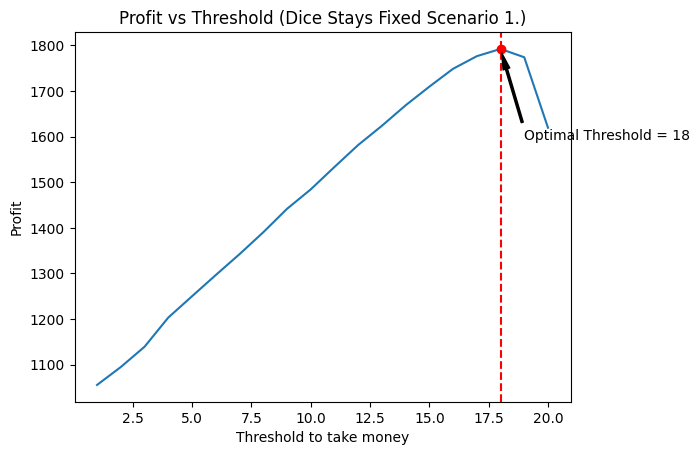

In [6]:
sweep_results = Scenario1()
plt.plot(range(1,21),sweep_results)
# label axis and title
optimal_threshold = np.argmax(sweep_results) + 1
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.plot(optimal_threshold, sweep_results[optimal_threshold-1], 'ro')
plt.annotate(f'Optimal Threshold = {optimal_threshold}', xy=(optimal_threshold, sweep_results[optimal_threshold - 1]), xytext=(optimal_threshold + 1, sweep_results[optimal_threshold - 1] - 200),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=5),
            )
plt.xlabel('Threshold to take money')
plt.ylabel('Profit')
plt.title('Profit vs Threshold (Dice Stays Fixed Scenario 1.)')

# Scenario 2.

In [7]:
def Scenario2():
    '''Take money or roll the dice, if you take money the dice dissapears and must be reroled next turn.'''
    sweep_results = []
    for threshold in range(1, 21):
        results = []
        for i in range(iterations):
            turns = 0
            profit = 0
            current = roll()
            while turns < 100:
                if current >= threshold:
                    profit += current
                    current = -1
                else:
                    current = roll()
                turns += 1
            results.append(profit)
        sweep_results.append(np.mean(results))
    return sweep_results

Text(0.5, 1.0, 'Profit vs Threshold (Dice Dissapears Scenario 2.)')

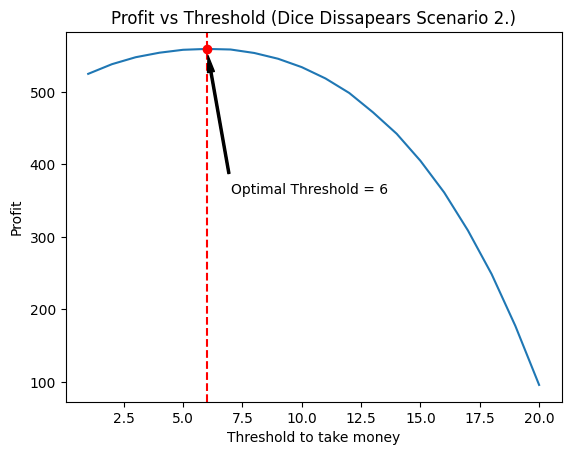

In [8]:
sweep_results = Scenario2()
plt.plot(range(1,21),sweep_results)
optimal_threshold = np.argmax(sweep_results) + 1
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.plot(optimal_threshold, sweep_results[optimal_threshold - 1], 'ro')
# indidate optimal threshold    
plt.annotate(f'Optimal Threshold = {optimal_threshold}', xy=(optimal_threshold, sweep_results[optimal_threshold - 1]), xytext=(optimal_threshold + 1, sweep_results[optimal_threshold - 1] - 200),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=5),
            )
plt.xlabel('Threshold to take money')
plt.ylabel('Profit')
plt.title('Profit vs Threshold (Dice Dissapears Scenario 2.)')

# Scenario 3.

Variant of Scenario 1. if you take the $, the casino can choose to re0roll the die. The casino aims to minimize your earnings.

In [9]:
iterations = 1000
def Casino(casino_threshold):
    '''Take $ or roll the dice. If you take the $ the dice stays fixed (you can keep the number on the table between rolls)'''
    sweep_results = []
    for threshold in range(1, 21):
        results = []
        for i in range(iterations):
            turns = 0
            profit = 0
            current = roll()

            while turns < 100:
                if current >= threshold:
                    profit += current
                    if current > casino_threshold: # casino re-rolls the dice
                        current = roll()
                else:
                    current = roll()
                turns += 1
            results.append(profit)
        sweep_results.append(np.mean(results))
    return sweep_results



# Optimal Player Threshold to maximize profit given an arbitrary Casino Threshold (between 1 and 21).



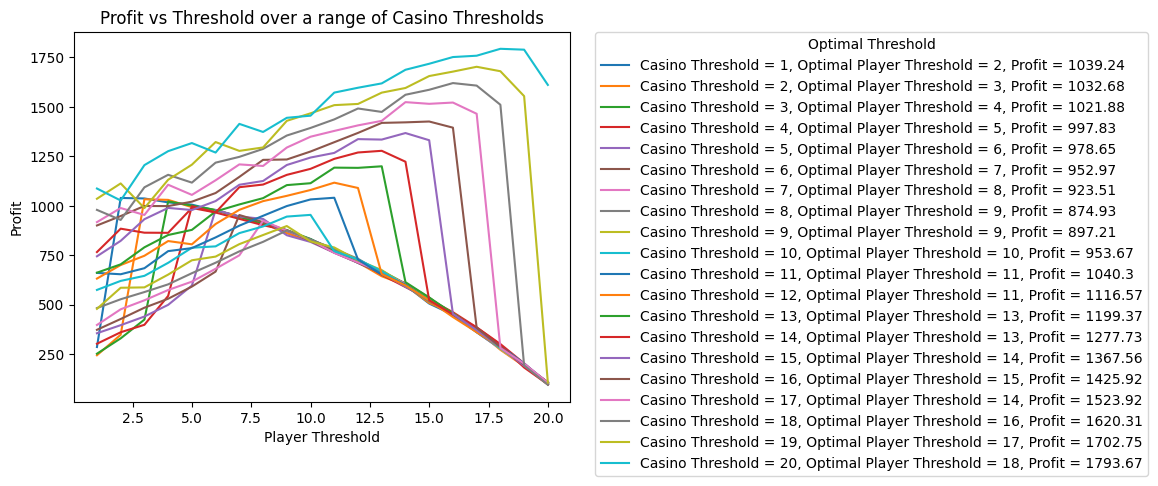

In [26]:
# create multiple plots over a range of casino thresholds, overlay them all on the same plot
iterations = 100
for casino_threshold in range(1, 21):
    sweep_results = Casino(casino_threshold)
    plt.plot(range(1,21),sweep_results, label=f'Casino Threshold = {casino_threshold}, Optimal Player Threshold = {np.argmax(sweep_results) + 1}, Profit = {np.max(sweep_results)}')
    plt.xlabel('Player Threshold')
    plt.ylabel('Profit')
    plt.title('Profit vs Threshold over a range of Casino Thresholds')
    # place the legend outside the plot
    # display the optimal threshold for each casino threshold in the legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Optimal Threshold')

plt.show()

#### If the casino wishes to minimize the players profit, given an optimal player, it should re-roll when the player takes more than 8$ on any given turn.

#### To mazimize player profit without any knowledge of the Casino Threshold, we must see the joint distribution.

In [70]:
iterations = 1000
def Casino2(player_threshold, casino_threshold):
    '''Take $ or roll the dice. If you take the $ the dice stays fixed (you can keep the number on the table between rolls)'''
    results = []
    for i in range(iterations):
        turns = 0
        profit = 0
        current = roll()
        while turns < 100:
            if current >= player_threshold:
                profit += current
                if current > casino_threshold: # casino re-rolls the dice
                    current = roll()
            else:
                current = roll()
            turns += 1
        results.append(profit)
    
    return results



# Gradient Descent to find the optimal player threshold for a given casino threshold (for fun)

Use gradient descent to find the optimal player threshold for a given casino threshold. The player threshold is the variable being optimized over and is constrained to the range of 1 to 20. The casino threshold is constant. The algorithm initializes the learning rate and the thresholds, then computes the gradient and updates the player threshold using the learning rate and the gradient. This is repeated for N iterations, and the threshold history and the profit history are returned as arrays.

In [134]:

def GradientDescent(initial_player_threshold, casino_threshold):
    # initialize the player threshold to 10
    player_threshold = initial_player_threshold
    # initialize the learning rate
    learning_rate = 0.001
    # initialize the threshold history
    threshold_history = []
    # initialize the profit history
    profit_history = []
    # initialize the profit
    profit = np.mean(Casino2(player_threshold, casino_threshold))
    # initialize the profit history
    profit_history.append(profit)
    # initialize the threshold history
    threshold_history.append(player_threshold)
    # iterate over the number of iterations
    for i in range(500):
        # calculate the gradient
        gradient = np.mean(Casino2(player_threshold + 1, casino_threshold)) - np.mean(Casino2(player_threshold, casino_threshold))
        # update the player threshold
        new_player_threshold = player_threshold + learning_rate * gradient
        if new_player_threshold >=1 and new_player_threshold <= 20:
            player_threshold = new_player_threshold
        # else:
        #     player_threshold = player_threshold - learning_rate * gradient
        # update the profit
        profit = np.mean(Casino2(player_threshold, casino_threshold))
        # update the profit history
        profit_history.append(profit)
        # update the threshold history
        threshold_history.append(player_threshold)
    return threshold_history, profit_history


In [135]:
def PlotConvergence(initial_player_threshold, casino_threshold):
    threshold_history, profit_history = GradientDescent(initial_player_threshold, casino_threshold)

    plt.plot(threshold_history)
    plt.xlabel('Iteration')
    plt.ylabel('Player Threshold')
    plt.title('Player Threshold vs Iteration')
    plt.show()

    plt.plot(profit_history)
    plt.xlabel('Iteration')
    plt.ylabel('Profit')
    plt.title('Profit vs Iteration')
    plt.show()


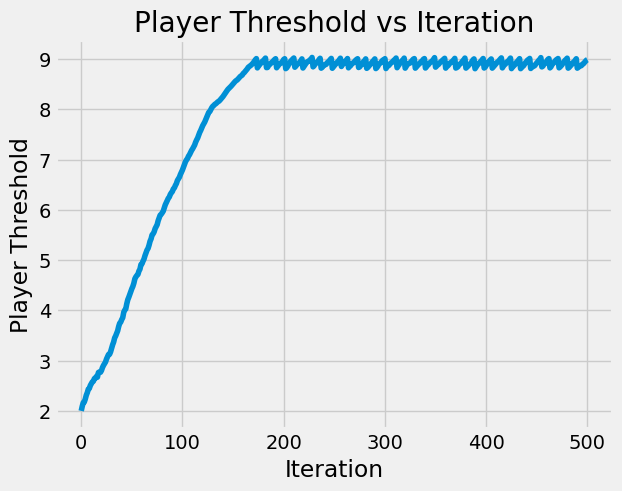

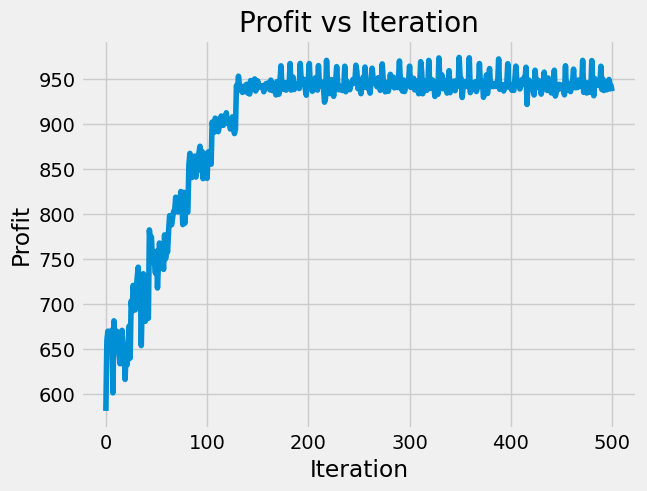

In [136]:
PlotConvergence(initial_player_threshold=2, casino_threshold=10)

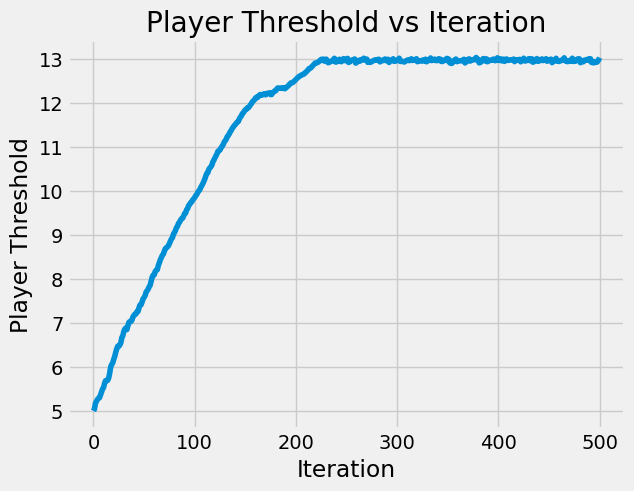

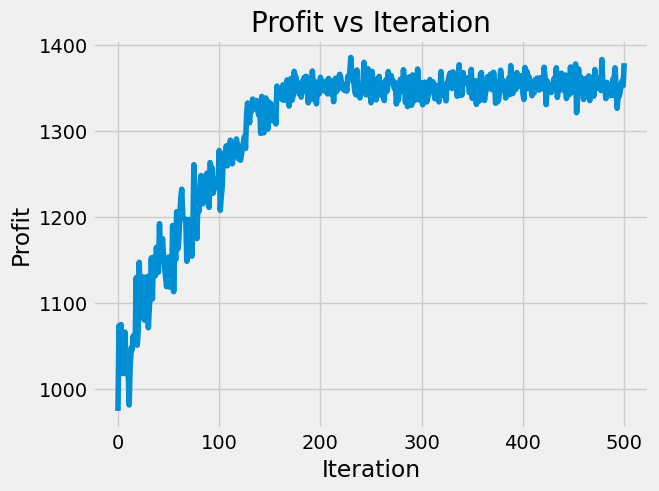

In [137]:
PlotConvergence(initial_player_threshold=5, casino_threshold=15)

In [140]:
PlotConvergence(initial_player_threshold=10, casino_threshold=28)

KeyboardInterrupt: 